# CS51 Assignment 2: Algorithms and Simulation

## OVERVIEW


This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.

## FORMAT

For optimal formatting, please use [Markdown and Code cells appropriately](https://drive.google.com/file/d/1RHoHCt_yWjOu7pGSCgPnLMJqY5H-w8Uf/view?usp=sharing) (more tips in this [Markdown cheatsheet](https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html)) and ensure ALL components of your work (including written analysis, images, tables, and code) are presented professionally. Anything marked as optional will only be scored if it is completed correctly. *Tip to avoid grammar and spelling errors*: do your writing using a program that is compatible with Grammarly, then copy your work into the notebook.

## HC GUIDELINES

You will be graded on the targeted HCs (#algorithms, #optimization, #modeling, #dataviz, #variables, #selfawareness) as indicated above in square brackets, at the discretion of the professor. "Footnotes" for these targeted HCs are not required. Please refer to the rubrics and your class notes as guidelines for these HCs. The optional challenges will only be given extra HC scores (4s or 5s) for correct and well-explained implementations that demonstrate deep knowledge.


If you believe that you have strong applications of other HCs, such as #estimation or #utility, please call this out. Doing so is an important part of reflecting on your learning. It should be an occasion for #selfawareness and #professionalism. However, since footnotes are not possible in Jupyter notebooks, simply provide the hashtag of the HC and a 1-3 sentence explanation of your application in a Markdown cell. Help the professor understand exactly why this constitutes a strong application. For guidelines on how to integrate HCs in your work and write meaningful footnotes, please see this guide, [Addressing HCs in your work](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit?usp=sharing), particularly section 3. For more samples of effective annotations, refer to the footnotes that go along with each HC example in the Outcome Index, written in square brackets.


## PART 1: OPTIMIZATION

For this section of the assignment, you will select one of the two scenarios below to describe how to optimize. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2 and include a map of these cities (you may use an existing map or draw your own). 


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 
Choose a scenario from above. Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? 

### Characterizing Scenario 1 by applying #rightproblem
This scenario is too ambigious and I feel it is necessary to make certain assumptions to formalize the problem. The assumptions are important to simplify the problem, making it amenable to existing mathematical and computing principles. Without some assumptions, this problem might be too complex to solve.The assumptions allow the scenario to be modelled as a graph problem. Assumptions are: <br>
1. The mode of transportation is by flight and every city affected has an airport (this is actually true in real life, each of the 15 cities affected by coronavirus that I have chosen have airports).The airports would be the nodes/vertices ***n***, where ***n*** = 15

2. There is a direct flight route between any two of the affected cities. This is a plausible assumption because most times, it is possible for flights to exist between any two airports in the US). This assumption is important to satisfy the triangle inequality necessary to solve this problem using Christofide's optimization algorithm for the travelling salesman problem (TSP). The triangle inequality simply states that any side of a triangle must be shorter than the sum of the other two sides. The implication for a graph problem is that the shortest distance/path from a vertex j to i is always to reach j directly from i. The flight route would be the edges ***v*** where ***v*** = 105 (calculation for this is attached as an image below). 

3. One of the cities selected is fixed as a starting point. The real life implication is that the vaccine was discovered and mass produced in one of the cities and must be distibuted from this city. This starting point is arbitrarily chosen as San Francisco :). Simplifying further with the assumption that only 1 flight is used for the distribution. This flight originates from San Francisco contains all the vaccines it needs (doesn't need to return to SF to get more vaccines before getting to other cities). This flight returns to SF after visiting all the cities. This completes the routes as a Hamiltonian cycle. A Hamiltonian cycle is one that visits every vertex in the graph exactly once and returns to that vertex (eg San Francisco Airport). This means that neither edges nor vertices can be repeated.  
4. For any pair of airports, each of those airports can be reached from the other. For eg, I can move from San Francisco to Seattle and from Seattle back to San Francisco. This makes the resulting graph an undirected graph which means that all edges are bi-directional. This is a plausible assumption because in real life, we can travel from airport A to B and vice versa. 
5. The edges in the resulting graphs are weighted. This means that edges are assigned values. In this scenario, the values assigned refer to the distances between any two airports. The length of a path between any two vertices is the sum of the weights along that part. This makes sense because the distance between airports across the US is not the same and there would be closer airports and farther ones. If I travel from Airport A to B to C, then the total distance covered will be distance from A to B plus distance from B to C. 




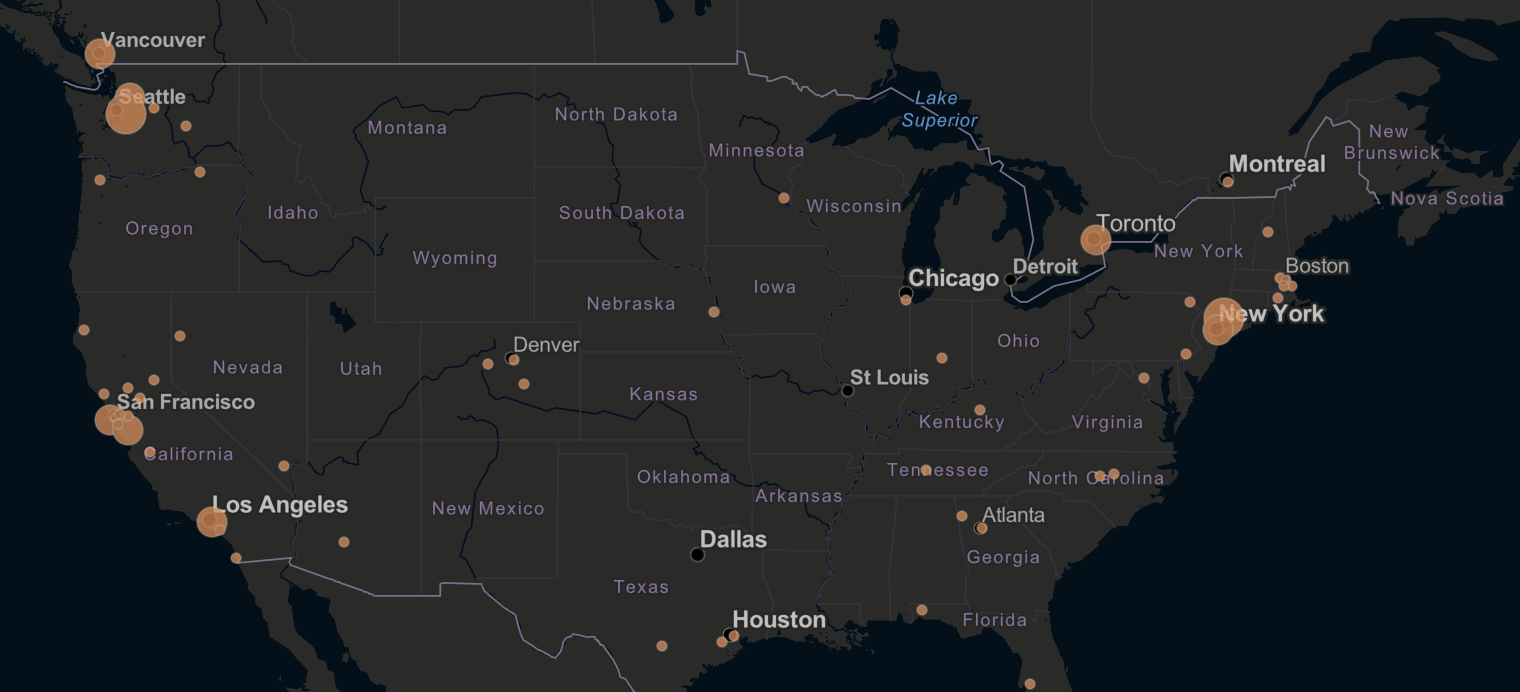

In [76]:
from IPython.display import Image
Image("Map of Cities.png") 

### Optimization Problem
This can be modelled as an optimization problem. Because of the urgency of distributing vaccines, we hope to deliver as quickly as possible. Thus:
1. Objective function: Distance (it can be measured in any unit but the units must be consistent across all airports. For this assignemt, I am using miles). We are trying to minimze the total distance travelled while traversing these cities. Minimizing time could be a potential objective function but I am not using it because the time taken depends on the speed of the aircraft and it is unrealistic for a plane to travel at the same speed throughout the flight. Distance on the other hand is always constant, it doesn't depend on the speed of the aircraft. 
2. Decision variables: The order of the routes taken. This is because the edges are weighted and different ordering of the routes produce different total distances. Hence, the different route orders will be the variables that would be manipulated by the algorithm to try to find a minimum distance. 
3. constraints: The solution found must visit all the cities. Again, the solution should be produced in a reasonable amount of time, that is, the algorithm must be computed in realistic time. The above are hard constraints for this problem. While the actual path of minimum distance is desirable, it is not a hard requirement due to the complexity of the problem. Hence, it can be viewed as an obstacle that be overcome by finding an approximate solution that is good enough. 


#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, and required steps. Name at least one other optimization technique that could be applied in this scenario and justify why you selected the technique you chose. Address whether your algorithm would lead to the global optimum. Hint: Some possible optimization algorithms that could be appropriate for this optimization problem were discussed in class.Optional but encouraged: Draw a flowchart to illustrate the process.  (<200 words)

I would be using the Christofides' algorithm to solve this problem. This is because the number of vertices n= 15 is large ( in the sense of graphs). Christofides' algorithm is a complex algorithm that gives an approximate solution to the travelling salesman problem. This means that it doesn't necessarily provide the exact solution but guarantees a solution that is very close to the exact solution (which has been proven to be within 1.5 times the global optimum). The input of this algorithm is a graph which will be represented as a priority heap  data structure (with justification given below) that contains the vertices (cities here) and the weighted edges between any two of the routes. These vertices and weighted edges will be stored as a key, value pair in a python dictionary. The algorithm can broken down into 6 stages. This #breakitdown approach is useful because the algorithm is very complex and it would be difficult to solve it without breaking it down. Again the division of the problem into smaller functions makes it easier for us to code because we'll be re-using some bits of code which will be packed into functions instead of coding the same logic over and over again.  <br>
1. Produce a minimum spanning tree (MST). A tree that contains all the vertices of a graph G is a spanning tree and a spanning tree T with the smallest possible weight is called a minimum spanning tree. The process of finding an MST is greedy which implies that we're not guaranteed a solution that is the global minimum. Here, all edges are sorted in an increasing order. We then initialize a new tree C. In each iteration, we choose the smallest available edge and add this edge to C (as long as it doesn't form a cycle) until all vertices have been reached. This part of Christofides' algorithm can be implemented using 2 known algorithms known as Prim-Jarnik's algorithm and Kruskal's algorithm. I would use Kruskal's algorithm because the running time is O(mlogn) which is more efficient than Prim's algorithm with O(n$^2$) for an unsorted list. 
2. Extract all the odd vertices in this MST. 
3. Connect each odd vertex in the graph to exactly one other odd vertex to create a perfect matching. A perfect matching is a set of edges that meet each of the odd vertices exactly once. 
4. Add the edges produced into the minimum spanning tree. 
5. Produce and Eulerian tour of the resulting graph. An Eulerian tour is a means of graph traversal that visits every edge once. 
6. Take shortcuts by removing vertices that repeated. <br>
At the end, the solutions of these 6 sub-problems will be summed to produce the final solution of this TSP. 
### Alternative Algorithms ###
The output of this algorithm is a a Hamiltonian cycle that produces a weighted graph within 1.5 times the global minimum. This means that the total distance produced by this algorithm is very close to the smallest possible distance but itself is not a global minimum. <br>
Other possible algorithms are: <br>
1. A brute force approach. This entails checking all the possible combinations of paths and picking the path with the smallest total weights. Because their are 15! such combinations, this algorithm runs in O($n!$) complexity which is unacceptable according to our constraint of reasonable time. <br>
2. A greedy approach called the nearest neighbor. This algorithm starts with a random city and then adds the nearest city (that is the next city with lowest weight) to it until every city has been visited. Because there are n(n-1)/2 edges in a complete graph, the time complexity is O($n^2$). This algorithm is far less accurate than the Christofides' algorithm hence I won't be using it. Again, the original random selection is unsuitable for this particular scenario because I am assuming that SF must be the first starting point (according to the constraint). 
<br>
Because Christofides' algorithm satisifies the constraints presented and the simplified problem satisfies the requirements for Christofides' (triangle inequality ), it is the algorithm of choice. It is implemented below. 





In [77]:
#!pip install pytsp #Uncomment this line to install this useful module 
import itertools #module for working with iterables

import numpy as np #using numpy for efficient iteration of arrays
import networkx as nx

from networkx.algorithms.matching import max_weight_matching #modules that implements perfect matching
from networkx.algorithms.euler import eulerian_circuit

from pytsp.utils import minimal_spanning_tree #imports the MST class produced above


def christofides_tsp(graph, starting_node=0):
    """
    Function implements Christofides' algorithm beginning at
    a fixed point, which will be San Francisco by default.
        graph: 2d numpy array matrix where the index of the distances is the 
        position of the cities affected created in the dict below eg San Francisco at index 0,
        Seattle at index 1, LA index 2 etc. These cities are rep with their airport codes
        The distance from an airport to itself is always 0.
        The distance from any of the airports to the other is in miles and filled in the array.
        starting_node: of the TSP
    Returns:
        tour given by christofies TSP algorithm
    """

    mst = minimal_spanning_tree(graph, 'Prim', starting_node=0) #calls on MST function created above to the graph
    odd_degree_nodes = list(_get_odd_degree_vertices(mst)) #gets the odd vertices of the MST
    odd_degree_nodes_ix = np.ix_(odd_degree_nodes, odd_degree_nodes)
    nx_graph = nx.from_numpy_array(-1 * graph[odd_degree_nodes_ix])
    matching = max_weight_matching(nx_graph, maxcardinality=True) #implements perfect matching 
    euler_multigraph = nx.MultiGraph(mst) #produces an Euler graph with repeated edges
    for edge in matching:
        euler_multigraph.add_edge(odd_degree_nodes[edge[0]], odd_degree_nodes[edge[1]],
                                  weight=graph[odd_degree_nodes[edge[0]]][odd_degree_nodes[edge[1]]])
    euler_tour = list(eulerian_circuit(euler_multigraph, source=starting_node)) 
    path = list(itertools.chain.from_iterable(euler_tour)) #iterates through edges in graph
    return _remove_repeated_vertices(path, starting_node)[:-1]


def _get_odd_degree_vertices(graph):
    """
    Finds all the odd degree vertices in graph
    Args:
        graph: 2d np array as adj. matrix
    Returns:
    Set of vertices that have odd degree
    """
    odd_degree_vertices = set()
    for index, row in enumerate(graph):
        if len(np.nonzero(row)[0]) % 2 != 0: #if the vertice is odd
            odd_degree_vertices.add(index) #append to index
    return odd_degree_vertices
#airports in their order with respective distances from each other retrieved from Google maps
airports_and_distances = {'SFO': [0, 810.6, 381.5, 2472.3,1934.7, 2107.2, 2935.3,2047.9\
                                 ,3108.9,2135.9,3106.9,1265.1,2890.7,2816.1,2281.5],     
                         'SEA':[810.6,0,387.5,2478.2,1940.6,2094.5,14.2,2035.2,3096.2\
                               ,2123.1,3112.9,1252.3,2878.0,2803.4,2268.8],
                         'LAX':[381.5,387.5,0,2196.6,1576.1,1998.9,2826.9,1844.5\
                               ,3000.6,2027.5,2748.4,1055.0,2733.0,2671.0,2072.5],
                         'ATL':[2472.3,2478.2,2196.6,0,792.4,879.1,884.7,576.1,1086.4\
                               ,747.7,656.8,1405.4,775.1,660.6,552.3],
                         'IAH':[1934.7,1940.6,1576.1,792.4,0,1123.8,1655.8,775.8,1852.2\
                               ,1081.5,1197.9,1005.5,1546.2,1404.8,989.2],
                         'MSN':[2107.2,2094.5,1998.9,879.1,1123.8,0,2926.9,308,963,109,1301,826,764\
                               ,684,284],
                         'JFK':[2935.3,14.2,2826.9,884.7,1655.8,2926.9,0,989.1,214.2,826.5,1297.9\
                               ,1792.7,113.9,260.2,751.6],
                         'STL':[2047.9,2035.2,1844.5,576.1,775.8,308,989.1,0,1193.9,297.9,1216.8\
                               ,842.8,901.5,818.1,241.0],
                         'BOS':[3108.9,3096.2,3000.6,1086.4,1852.2,963,214.2,1193.9,0,2122.6\
                               ,3112.3,1251.8,2877.4,2802.8,2268.2],
                         'ORD':[2135.9,2123.1,2027.5,747.7,1081.5,109,826.5,297.9,2122.6,0\
                               ,1399.3,992.1,782.4,707.8,207.6],
                         'MIA':[3106.9,3112.9,2748.4,656.8,1197.9,1301,1297.9,1216.8,3112.3,\
                               1399.3,0,2059.8,1180.1,1065.6,1206.8],
                         'DEN':[1265.1,1252.3,1055.0,1405.4,1005.5,826,1792.7,842.8,1251.8,\
                               992.1,2059.8,0,2879.7,2805.1,2270.5],
                         'PHL':[2890.7,2878.0,2733.0,775.1,1546.2,764,113.9,901.5,2877.4,\
                               782.4,1180.1,2879.7,0,150.3,664.1],
                         'IAD':[2816.1,2803.4,2671.0,660.6,1404.8,684,260.2,818.1,2802.8,\
                               707.8,1065.6,2805.1,150.3,0,851.6],
                         'IND':[2281.5,2268.8,2072.5,552.3,989.2,284,751.7,241.0,2268.2,\
                               207.4,1206.8,2270.5,664.1,851.6,0]}
def _remove_repeated_vertices(path, starting_node):
    """Function removes the repeated vertices by short-cutting the euler path created initially"""
    path = list(dict.fromkeys(path).keys()) #extracts the keys from dictionary which rep the weighted edges
    path.append(starting_node) #adds these edges to the starting city
    return path #returns a minimum/efficient path
graph =  np.array([[0, 810.6, 381.5, 2472.3,1934.7, 2107.2, 2935.3,2047.9\
                                 ,3108.9,2135.9,3106.9,1265.1,2890.7,2816.1,2281.5],
                   [810.6,0,387.5,2478.2,1940.6,2094.5,14.2,2035.2,3096.2\
                               ,2123.1,3112.9,1252.3,2878.0,2803.4,2268.8],
                  [381.5,387.5,0,2196.6,1576.1,1998.9,2826.9,1844.5\
                               ,3000.6,2027.5,2748.4,1055.0,2733.0,2671.0,2072.5],
                  [2472.3,2478.2,2196.6,0,792.4,879.1,884.7,576.1,1086.4\
                               ,747.7,656.8,1405.4,775.1,660.6,552.3],
                  [1934.7,1940.6,1576.1,792.4,0,1123.8,1655.8,775.8,1852.2\
                               ,1081.5,1197.9,1005.5,1546.2,1404.8,989.2]
                  ,[2107.2,2094.5,1998.9,879.1,1123.8,0,2926.9,308,963,109,1301,826,764\
                               ,684,284],
                  [2935.3,14.2,2826.9,884.7,1655.8,2926.9,0,989.1,214.2,826.5,1297.9\
                               ,1792.7,113.9,260.2,751.6],
                  [2047.9,2035.2,1844.5,576.1,775.8,308,989.1,0,1193.9,297.9,1216.8\
                               ,842.8,901.5,818.1,241.0]
                  ,[3108.9,3096.2,3000.6,1086.4,1852.2,963,214.2,1193.9,0,2122.6\
                               ,3112.3,1251.8,2877.4,2802.8,2268.2],
                  [2135.9,2123.1,2027.5,747.7,1081.5,109,826.5,297.9,2122.6,0\
                               ,1399.3,992.1,782.4,707.8,207.6],
                  [3106.9,3112.9,2748.4,656.8,1197.9,1301,1297.9,1216.8,3112.3,\
                               1399.3,0,2059.8,1180.1,1065.6,1206.8],
                  [1265.1,1252.3,1055.0,1405.4,1005.5,826,1792.7,842.8,1251.8,\
                               992.1,2059.8,0,2879.7,2805.1,2270.5],
                  [2890.7,2878.0,2733.0,775.1,1546.2,764,113.9,901.5,2877.4,\
                               782.4,1180.1,2879.7,0,150.3,664.1],
                  [2816.1,2803.4,2671.0,660.6,1404.8,684,260.2,818.1,2802.8,\
                               707.8,1065.6,2805.1,150.3,0,851.6],
                  [2281.5,2268.8,2072.5,552.3,989.2,284,751.7,241.0,2268.2,\
                               207.4,1206.8,2270.5,664.1,851.6,0]])

                                      
christofides_tsp(graph) #the output is the position of the cities in the 2-d numpy array.
#to produce a more useful and understandable output, I typed the order of the cities myself by
# referencing the output of Christofides' algorithm then summed the distances in this order by myself




[0, 11, 5, 9, 14, 7, 4, 3, 10, 13, 12, 6, 8, 1, 2]

In [78]:
print('The desired route is SFO-DEN-MSN-ORD-IND-STL-IAH-ATL-MIA-IAD-PHL-JFK-BOS-SEA-LAX''\n'
     'This represents the cities San Francisco, Denver,Madison,Chicago,Indianapolis,St.Louis,'\
     'Houston,Atlanta,''\n' 'Miami,Washington DC, Philadelphia,New York,Boston, Seattle and Los Angeles' \
     'respectively')
print('The total distance is', 1265.1+2096.2+135+207.6+241.0+773.1+793.1+656.8+1065.6+151.3+115.7+241.2+793.7\
     +387.5,'miles')

The desired route is SFO-DEN-MSN-ORD-IND-STL-IAH-ATL-MIA-IAD-PHL-JFK-BOS-SEA-LAX
This represents the cities San Francisco, Denver,Madison,Chicago,Indianapolis,St.Louis,Houston,Atlanta,
Miami,Washington DC, Philadelphia,New York,Boston, Seattle and Los Angelesrespectively
The total distance is 8922.9 miles


#### 1.3 Interpretation: 

Describe how the results of the optimization could be interpreted. What are the limitations of these interpretations? (<50 words)

Because Christofides' algorithm is inherently greedy, the solution found is not guaranteed to be the global minimum. However,it has been proven in Rosen's Discrete Mathematics and Its Applications that this algorithm produces a solution that is within 1.5 times the exact solution which is the global minimum. This algorithm does this in polynomial worst case time (specifically O($n^4$) time complexity) which means that although the answer is very close and almost optimized to the global minimum, it inefficient in computing time. This shortcoming is acceptable because the TSP is a known NP-hard problem which basically means that a 'best' solution to this problem runs in at least polynomial time complexity and not better than that. It is O($n^4$) time complexity because the minimum spanning tree produces an O($n^2$) time complexity and the MST produced, we traverse it again to get the odd vertices which produces O($n^3$). Finally, we traverse the odd vertices again to remove duplicated vertices and this produces a total of O($n^4$). <br>
Another limitation of this algorithm is that it only works when the graph satisfies the triangle inequality. This  means that the must be a direct path/route between any two airports. If in reality there was no direct route from SFO to LAX, then this algorithm wouldn't be useful. 

## PART 2: SIMULATION

The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus) agent-based model in NS50 and will review it again in Week 7 of CS51. The following links will help you learn more about the SIR model: 

- An accessible [video](https://www.youtube.com/watch?v=XWXqXzAYe4E) introduction to the SIR model

- A [paper](http://op12no2.me/stuff/tjsir.pdf) that describes the SIR model and its numerical simulation

- A series of [educational lessons](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) on the SIR model


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate. If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease.

### 2.1 Numerical Modeling and Simulation

#### 2.1.1 Numerical Modeling: 
Describe the disease you selected to model and explain how you will set up the model of disease dynamics as a set of differential equations. Identify the relevant variables and explain what they mean in the context of your model. Explain how to select appropriate values for the relevant parameters, including the initial values. You're encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned estimation for any values that are difficult to justify with empirical data. Explain any assumptions of your model. [#modeling, #variables, and potentially #estimation]  (<150 words)

The disease to be modelled is the spread of the novel coronavirus commonly (COVID-19) which originated in Wuhan China in 2019. It models the spread of the disease in San Francisco made up of 900000 students over a span of 730 days (2 years). Coronavirus is highly infectious with a relatively low fatality rate compared with the Ebola virus. There is currently no vaccine for the virus. This disease can be modelled as an SIR model using the following sets of differential equations. In this model, we divide the entire population n into 3 groups; S = S(t) representing the number of suceptibles, I = I(t) representing the number of infected people (and infectious i.e they are capable of spreading coronavirus) and R = R(t) representing the number of recovered individuals (the number of dead people are also included here as they cannot technically be infected again) at a particular time t. <br>
$$\frac{dS}{dt} = -bS(t)I(t)$$ <br>
$$\frac{dI}{dt} = bS(t)I(t) - kI(t)$$ <br>
$$\frac{dR}{dt} = kI(t)$$ <br>
The simulation of this model is deterministic because there is no element of randomness in generating any of the values. Again, it produces the same output when run with the same inputs over and over again. With this model, the independent variable is time measured in days. Time in this model is a quantitative continous variable.It is quantitative because it takes on numerical values (specifically real number values) It is also continous because this model is a continous time dynamics model which means that model traces the evolution of some variables ( S, I and R) over time using a set of differential equations. This further implies that the variables can take infinitely many values for very small intervals of time. The dependent variables in this model are S(t), I(t) and R(t) as defined above. Because the population is divided into these three groups, the sum of S, R, and I must equal (or rather be approximately equal since they are continous) the total population size at any point in time t. S, R and I are also quantitative continous variables because they have numerical values and they are modelled as evolving over continous time. The constants b and k represent the infection and recovery rates respectively.For this model, b means the number of people that each infected person infects per day. K represents the number of infected people that recover per day.  As I increases, S likely decreases because if the number of infected people increase, then depending on the constant b (if it's >0), the number of susceptibles decreases and moves to the infected zone. In the first equation, b is negative because it represents a decreasing rate of change i.e the number of suceptibles decreases over time. Empirical data from the University of Göttingen Research Institute suggests that for coronavirus, b = 0.050065/900000 (because we are modelling for the total population of SF) and k = 0.0181. Because this virus is novel, it is safe to assume that no person in San Francisco initially had a resistance to it, hence S[0] is 900000-1 = 899999 which is the population of SF minus the infected person as shown in the model. Again, because noone had recovered before the initial outbreak in San Francisco, R[0] = 0. Finally, I'm assuming that the original number of infected persons is 1 because for the disease to spread, at least one person from SF must be infected. This assumption might be unrealistic but I am using it as a conservative estimate for the number of originally infected people which must always be greater than or equal to 1. Other assumptions of the model are that San Francisco is isolated which means that nobody is added or removed from the current population of San Francisco (we are ignoring new births and immigration). I also assume there is homogenous mixing which means that each suceptible has the same probability of meeting an infected person.Finally, we assume that a recovered individual is immune and cannot be infected again. These assumptions are not necessarily realistic but they simplify the type of interactions we see in real life. Solving the SIR model means deriving functions/formulae that precisely determine the values of S, I and R for any value of t which satisfies the set of differential equations.  



#### 2.1.2 Numerical Simulation: 

Implement a numerical simulation to derive the implications of your model using Euler's method in Python. Include thorough comments in your code to convey your understanding of the implementation of Euler's method. [#algorithms]

***Optional Super Challenge***: Modify your code to add a layer of real-world complexity, such as:

- Vaccination

- Antibiotic use and/or development of antibiotic resistance

- Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).

Be sure to explain what you are doing, and add extra cells in the notebook as needed.

#### 2.1.3 Visualization: 

Create at least one relevant visualization of the disease dynamics. Include a descriptive figure legend. [#dataviz].

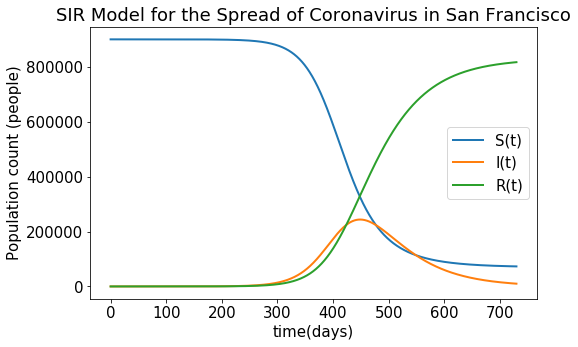

In [79]:

import numpy as np

t0 = 0 # Initial time
t_end = 730 #end time

h = 0.1 # Step size for the Euler approximation which represents delta t
steps = int((t_end - t0)/h + 1) # number of steps

t = np.linspace(t0, t_end, steps) # storing t values
S = np.zeros(steps) # for storing S values
I = np.zeros(steps) # for storing I values
R = np.zeros(steps) # for storing I values

b = 0.050065/900000 # Infection rate for coronavirus
k = 0.0181   # Recovery rate (Death rate) for coronavirus

def dSdt(t,S,I):
# dS/dt is the slope of S(t) at the point t (instantaneous rate of change of S at t) used for Euler's approximation
    return - b * S * I #approximates the soln of the differential eqn ds/dt

def dIdt(t,S,I):
# dI/dt is the slope of I(t) at the point t (instantaneous rate of change of I at t) used for Euler's approximation
    return (b*S-k)*I #approximates the soln of the differential eqn dI/dt

def dRdt(t, I):
# dI/dt is the slope of R(t) at the point t (instantaneous rate of change of R at t) used for Euler's approximation
    return k*I #approximates the soln of the differential eqn dR/dt

# initial condition
S[0] = 900000 #initial number of susceptibles in res hall
I[0] = 1 #initial number of infected students
R[0] = 0 #initial number of recovered students

for n in range(steps-1): # range(start, stop, step)
    S[n+1] = S[n] + h * dSdt(t[n],S[n],I[n]) # applies euler's approximation to produce subsequent values
    I[n+1] = I[n] + h * dIdt(t[n],S[n],I[n]) # applies euler's approximation to produce subsequent values
    R[n+1] = R[n] + h * dRdt(t[n],I[n]) #applies euler's approximation to produce subsequent values
    #print(S[n]+I[n]+R[n]) #checks if S I and R sum up to the total population of 163
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]
plt.plot(t,S,linewidth=2,label='S(t)')
plt.plot(t,I,linewidth=2,label='I(t)')
plt.plot(t,R,linewidth=2,label='R(t)')
plt.xlabel('time(days)')
plt.ylabel('Population count (people)')
plt.legend(loc='best')
plt.title("SIR Model for the Spread of Coronavirus in San Francisco")
text = ("Graph showing the relationship between S(t), I(t) and R(t) for ")
plt.show()

#### 2.1.4 SIR Model vs Numerical Simulation: 

What is the relationship between the SIR model differential equations and the numerical simulation you created? You may consider, for example, whether the model and simulation are continuous or discrete. You should also consider what it means to solve the SIR model and how your numerical simulation via Euler's method is helpful for this purpose. [#modeling] (<120 words)

With the reasons given above, we know that the SIR model is continous in nature and solving the SIR model means deriving functions/formulae that precisely determine the values of S, I and R for any value of t which satisfy the set of differential equations. Solving those equations analytically is extremely difficult so we resort to using Euler's approximation method of numerical simulation. <br> 
The numerical simulation produces an approximate solution to the set of differential equations of the SIR model. The "solution" of the SIR model using Euler's method is a table of values (discrete and stored as lists) for S, I and R at each step of time (t). Because the numerical solution involves distinct time steps and we update the evolution of S, I and R at each step, this numerical solution is discrete in nature. It appears continous in the visualization because python's matplotlib library automatically connects the discrete dots to form a smooth curve. However, euler's method produces a discrete approximation.  

#### 2.1.5 Numerical Results and Interpretation: 

Describe how the results of the numerical simulation can be interpreted, being sure to reference the output in the visualization. What insights can be gained from this simulation? What happened when you ran the model with varying parameter choices? What limitations does this simulation have? Note: To fully interpret the results, you should run the simulation multiple times with varying parameter inputs and observe the behavior of your model. [#modeling] (<120 words)

We can see that S(t) decreases rapidly in the first 300-350 days (i.e in the first year of the spread) from 900000 (initial population) but gradually remains stable from day 400 at a value of about 100000.Again, we see that I(t) increases rapidly in the first 400 days from 1, reaching a peak value of about 220000 at day 45- before declining rapidly to almost 0 (if not 0) by day 730. Finally, R(t) remains relatively constant at 0 for the first 320- 330 days before growing rapidly and stabilizing at approximately 800000 by day 730. These observations make sense because the high infectiousness of the disease means that people get infected easily and if more people get infected, the higher the probability of the remaining susceptibles to get infected too. This accounts for the rapid downward trend in S(t) and upward trend of I(t) because more susceptibles will join the infected group. The upward trend in R(t) at day 420 suggests that people generally start recovering or dying at after the first 400 days. While this is not necessarily realisitic because we know that people recover from coronavirus in far less than the first 400 days, it tells us that coronavirus has a long incubation and infectiousness period. Again, this model predicts that the disease begins to die out at about Day 730. When run with initial I as 100, we see a similar pattern of graphs but S(I) peaks earlier and dies out earlier by Day 500. This higher peak and earlier die out date is consistent with higher values of I. This suggests that the more people that are originally infected, the faster it is for the disease to die out. While the overly simplified assumptions are unrealistic, the major limitation of this model is that it fails to account for the latency/incubation period for coronavirus. COV-19 is known to have an incubation period of 1-14 days. During this period, an infected person is less likely to infect others because he is not exhibiting symptoms such as coughing and sneezing that help spread the disease. To correct for this, an additional parameter called exposed can be added (which is commonly added as an extension of the SIR called SEIR). A constant called the incubation rate is also added which represents the rate at which exposed people become infectious. This could give a more realistic representation of the real life behavior of COV-19. Another minor limitation is that there is real life evidence from WHO that a person who has been recovered can be reinfected. This should also be accounted. However, it is not very important because it is rare so far with the information we currently have about the virus. Furthermore, it would be nice to know the estimated number of people who die vs those who actually recover from the disease. This model doesn't show us that. To account for deaths and actual recovery, we must take account of population variability. We know that the elderly are more likely to die from the virus than younger people. This can better be done with an ABM in which the agents with their respective characteristics are distinguished.  

###  Agent-Based Modeling and Simulation

#### 2.2.1 Agent-Based Modeling: 

Use the [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus) model to simulate the spread of your selected disease. To do so, be sure to choose appropriate parameters for your selected disease and justify them. Provide a brief overview of this model, including a description of the algorithm that NetLogo uses for the simulation and the main assumptions involved. [#modeling, #variables] (<150 words)

Netlogo is an agent-based stochastic model which makes use of randomness in its algorithm to model the transmission of viral diseases. This model is also discrete because the agents themselves are whole numbers and the values the parameters take are also whole numbers. The variables in this model are the sick (analogous to infected in SIR), the healthy(analogous to susceptibles) and the immune(analogous to R). The main parameters in this model are the infectiousness rate (on a scale of 1-100), the recovery rate(scale of 1-100) and the duration of the disease(in days). The agents in this model are the ticks/people that follow simple rules such as move randomly around, depending on the rate of infectiousness, contract the disease, recover or die, get immunity after recovering which lasts for a year, die of old age (maximum age is 50) and reproduce when the carrying capacity is below 300. In modelling coronavirus, the transmission rate is set to 85% because the virus is known to be highly infectious and the duration is set to 6 weeks (2 weeks of incubation plus 4 weeks of struggling with the symptoms of the disease). The chance of recovery is set to 60% because the disease is known to have a high recovery rate in young people and low in old and sick people. This polarized recovery rates is balanced by using 60% in favour of the younger people.  The assumptions of this model are:
1. Homogenous mixing of the population and immunity which lasts for a year. 
2. Agents die at the age of 50 at most. 
3. No vaccine is introduced in the population.

#### 2.2.2 Visualization: 

Select at least one informative visualization of the disease dynamics

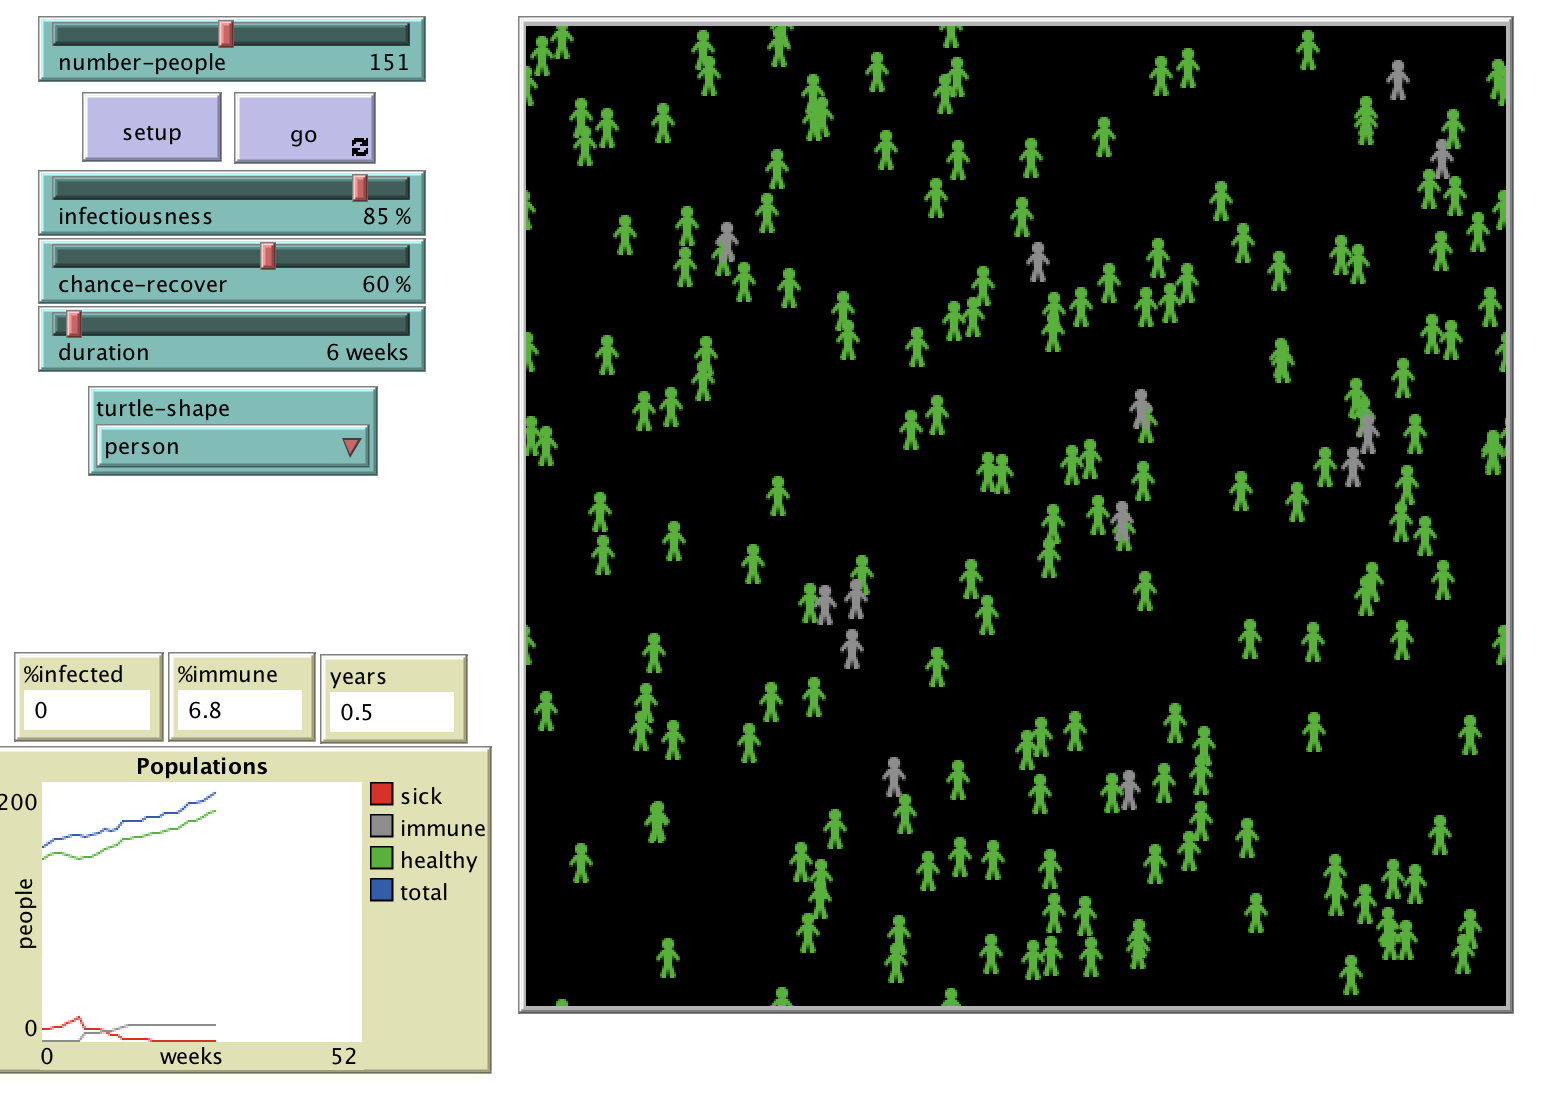

In [80]:
# replace FILE_NAME_2.2.2.png with an image of your visualization
# The images won't display unless they're in the same folder as this ipynb
# Be sure to run the cells to display the image

from IPython.display import Image
Image("Netlogo.png") 

#### 2.2.3 Agent-Based Model Interpretation: 

After running the simulation multiple times, describe how the results from the agent-based simulation can be interpreted, being sure to reference the output in the visualization above. What insights can be gained from this simulation? What limitations does this simulation have? [#modeling] (<100 words)

From the graph in the figure above, we can see that there was a decline in the healthy population as the number of sick people rapidly increased within the same period of time. This rapid decline and rise in susceptibles and infected represents the initial outbreak of the virus. However, the disease quicky dies out at week 26. This means that Netlogo predicts that coronavirus will die out of the population of SF in 6 months time. Again, the peak of the number of sick people matches witth the lowest point of the number of healthy and susceptible people at about week 5. This makes sense because the higher the infected the lower the number of healthy people because there'd be a higher probability of gettig infected. The peak at Week 5 means that Netlogo predicts that the highest incidence of an outbreak will be in Week 5 or thereabout and we should expect a decline after that. A peak value of about 5 people suggests that only 5/200 = 2.5% of the population would be infected at the worst part of the outbreak. 
#### Limitations
1. This model assumes that the only way to spread this virus is by contact with an infected. However, we know that a person can get the disease by touching infected surfaces. 
2. The model doesn't account for variability in the population. Because the elderly and sick are more susceptible, they should have a higher probability of getting the disease.
This model can be improved by adding variability in the population. For example, the agents could be grouped into age groups where older people are more susceptible to the virus. With this decomposition in the ABM, we would see a pattern in which the elderly are removed faster while the rest of the population survives and reproduces). This would be different from the pattern we have seen where everyone becomes immune or healthy after 6 months. An alternative decompostion is grouping according to gender but this would not offer insightful information because there is no evidence that coronavirus discriminates according to gender eg, males being more susceptible etc). This would produce a more realistic model.


#### 2.2.4 Simulation Comparison: 

Compare and contrast the numerical simulation you wrote in Python with the NetLogo virus simulation. Based on all of the above analysis, what are the biggest differences between these simulations, and which one is a more realistic representation of nature? Why? Be sure to address whether these are stochastic or deterministic simulations and to consider the results. [#modeling] (<100 words)

The main differences in the two models are:
1. Netlogo is stochastic while the numerical simulation is deterministic. 
2. The numerical solutions assumes a closed population without birth or immigration while Netlogo includes new births.
3. The numerical simulation predicts that coronavirus dies out in the second year while Netlogo predicts 6 months. 
#### Similarities
1. Both show a rapid upward trend reflecting an initial outbreak and a steady decline in the number of infected over time. 
2. Both also show an initial rapid decline in susceptibles and a steady rise after a while. 
3. Both assume homogenous mixing of populations. 
#### Choosing a model
I believe the Netlogo ABM is more realistic than the SIR model. This is because in real life, agents/people have their indiviudal characteristics such a birth, death from old age etc which can affect the spread of a virus in the population. Again, this model is more flexible and can be applied to a wider range of scenarios than the numerical simulation. For example, it can be easily adapted to model the spread of coronavirus in an airplane by setting up an airplane environment with seats etc. The stochastic nature is also more realistic than the deterministic nature of SIR because real life is usually random. Finally, there is more sensitivity to initial conditions in the ABM. If we're modelling the spread of the virus in an aircraft,different seating arrangements (and sitting positions of an infected) will produce different results whereas the SIR wouldn't account for such nuances. 


#### 2.2.5 Optional Super Challenge:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). One option: a tree graph can be useful in modeling person-to-person interactions. Another option: turtles. [#algorithms, #modeling]

In [81]:
# Add code to complete the optional implementation 

## REFLECTION

Describe how you obtained the knowledge to complete the assignment, being sure to include attributions to specific individuals or groups who helped you and how they helped. You should elaborate on any strategies you used to assess your own understanding of the material. [#selfawareness] (<100 words)

To solve the TSP optimization problem, I read Discrete Mathematics and Its Applications by Kenneth Rosen. His description of the travelling salesman problem and Christofides' algorithm helped me simplify the Scenario 1 by making assumptions that would fit the Christofides' requirements. I also read Data Structures and Algorithms in Python by Goodrich Tamassia. This book taught me how to implement a heap priority queue data structure and the Kruskal's algorithm which I used for the assignment. I also carefully explained my thought processes in simplifying Scenario 1 and gave reasons for any of the assumptions that I made. Each time I thought about a possible scenario, I wrote it down so I wouldn't forget it. At the end, I had a list of possible scenarios and I continued simplifying (iteratively) to get the final product. This shows that I was paying careful attention to my thought processes in this assignment. Again,the numerical simulation code was gotten from class and I just tweaked it a little to include dr/dt. Finally, I got help from Stevedavies, Vlad and Artem who explained how the SIR numerical simulation works.
### Science of learning strategies
1. I read many papers on the travelling salesman problem and the different algorithms they explained were difficult to understand because of their abstract nature. To better understand, I tried tracing the algorithms on paper to see how they work. This is an example of using the principle of dual codes. I had read language descrtiptions of the algorithm but seeing a visualization as I traced each step helped me to better understand and remember the concept. 
2. I used spaced practice and appropriate difficulty. Spaced practice was the learning technique and I used Anki cards to achieve this. I wrote down the 6 steps of Christofides' algorithm and memorized them in increasing intervals. Again, I am a coding peer tutor and while I can code simple problems, the TSP is very difficult and I decided to challenge myself by attempting to solve it. I also saw this as a great opportunity to practice the data structures and algorithms concpets I have been studying on my own this semester. Those concepts are very abstract and difficult for me to understand, hence I decided to do the optional challenge to apply what I had studied. 

### Additional HC Applications
1. #scienceoflearning: I have explained the learning strategies I used (above) and why they were relevant for understanding the learned concepts. 
2. #rightproblem: I made several well-justified assumptions to simplify Scenario 1. These assumptions helped me to effectively characterize the problem, reduce its ambiguity and extract the logic of the problem. I recognized that rushing into the problem without characterizing and simplifying it would be an ineffective approach and I took steps to correct it. Again, framing as an optimization problem helped me identify my initial and goal states and potential constraints. 
3. #gapanalysis: Because there are several existing algorithms and a particular one for this version of TSP, there is no gap to be filled by coding for a new algorithm. I have identified different potential solutions (algorithms) to the TSP problem I characterized earlier. I also evaluated these algorithms by comparing them to my constraints and chose Christofides'. I have clearly analyzed the chosen algorithm (by considering its time complexity etc) including its ability to guarantee a very close approximate solution, the advantages and disadvantages. 
4. #constraints: I have clearly stated my constraints and distinguished between the hard constraints and mere obstacle of getting the global minimum with justification. I have equally used my constraints to evaluate exisitng solutions and chose Christofides' algorithm after these evaluations.
5. #breakitdown: I broke Christofides' algorithm into 6 different tractable sub-problems which I packed into smaller functions. I called these functions along the way to produce the final solution of the big TSP problem. I have also explained the usefulness of breaking the solution into sub-problems as functions. 
6. #mulitpleagents: In offering an improvement to the ABM, I offered a decomposition that reflects population variability. I have justified this particular decomposition according to age groups by considering empirical data of how coronavirus affects the population. I have also identified another potential decomposition but explained by I avoided it because coronavirus doesn't discriminate by gender. Finally, I explained the possible pattern of the disease dynamics we might see in this model.

## You're done! 

You must upload TWO files:


1. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.


2. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Run all cells before converting the notebook to a PDF, and triple check to make sure that the PDF is complete with all components (code, writing, images) visible and properly formatted. Email attachments will not be accepted. If you're having difficulty converting your notebook to a PDF, please try the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing).